# Bond with Embedded Calls and Put Options

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from financepy.utils import *
from financepy.products.bonds import *
from financepy.market.curves.discount_curve import DiscountCurve
from financepy.products.rates import *
from financepy.models.hw_tree import HWTree
from financepy.models.bk_tree import BKTree

## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [3]:
value_dt = Date(1, 1, 2007)
settle_dt = value_dt

### Set up discount curve

In [4]:
dc_type = DayCountTypes.ACT_360
fixed_freq = FrequencyTypes.SEMI_ANNUAL
swap_type = SwapTypes.PAY
swap1 = IborSwap(settle_dt, Date(1,1,2008), swap_type, 0.05, fixed_freq, dc_type)
swap2 = IborSwap(settle_dt, Date(1,1,2009), swap_type, 0.05, fixed_freq, dc_type)
swap3 = IborSwap(settle_dt, Date(1,1,2010), swap_type, 0.05, fixed_freq, dc_type)
swaps = [swap1, swap2, swap3]
discount_curve = IborSingleCurve(value_dt, [], [], swaps)

### Set up the Puttable Bond

First create a bond that we will use as a reference

In [5]:
issue_dt = Date(1,1, 2000)
maturity_dt = Date(1, 1, 2010)
coupon = 0.05
freq_type = FrequencyTypes.ANNUAL
dc_type = DayCountTypes.ACT_ACT_ICMA

In [6]:
bond = Bond(issue_dt, maturity_dt, coupon, freq_type, dc_type)

In [7]:
v = bond.clean_price_from_discount_curve(settle_dt, discount_curve)

In [8]:
print("Pure Bond Price:", v)

Pure Bond Price: 99.62397562281713


Now specify the put and call dates

In [9]:
call_dts = []
call_prices = np.array([])
put_dts = [Date(1, 1, 2008), Date(1, 1, 2009), Date(1, 1, 2010)]
put_prices = np.array([100.0, 100.0, 100.0])

Now create the BondEmbeddedOption

In [10]:
puttable_bond = BondEmbeddedOption(issue_dt, maturity_dt, coupon, freq_type, dc_type,
                                     call_dts, call_prices, put_dts, put_prices)

### The Hull-White Model

In [11]:
sigma = 0.01  # basis point volatility
a = 0.1
num_time_steps = 200

In [12]:
model = HWTree(sigma, a, num_time_steps)

In [13]:
v = puttable_bond.value(settle_dt, discount_curve, model)

In [14]:
print(v)

{'bondwithoption': 100.47140041071114, 'bondpure': 99.61096301558383}


### Convergence Testing

In [15]:
time_steps = range(20,220,1)
values = []
for num_time_steps in time_steps:
    model = HWTree(sigma, a, num_time_steps)
    v = puttable_bond.value(settle_dt, discount_curve, model)
    values.append(v['bondwithoption'])

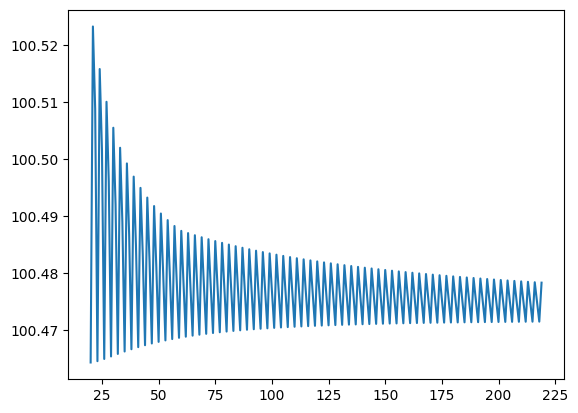

In [16]:
plt.plot(time_steps, values);

Copyright (c) 2020 Dominic O'Kane